<a href="https://colab.research.google.com/github/awakedupex/AI-YouTube-Learn-Buddy/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Nifty 50 Spectral Graph Analysis
Fetching stock data from 2023-09-29 to 2025-09-28...
✓ RELIANCE.NS
✓ TCS.NS
✓ HDFCBANK.NS
✓ INFY.NS
✓ HINDUNILVR.NS
✓ ICICIBANK.NS
✓ KOTAKBANK.NS
✓ SBIN.NS
✓ BHARTIARTL.NS
✓ ITC.NS
✓ ASIANPAINT.NS
✓ LT.NS
✓ AXISBANK.NS
✓ DMART.NS
✓ MARUTI.NS
✓ SUNPHARMA.NS
✓ TITAN.NS
✓ ULTRACEMCO.NS
✓ NESTLEIND.NS
✓ WIPRO.NS
✓ HCLTECH.NS
✓ BAJFINANCE.NS
✓ POWERGRID.NS
✓ NTPC.NS
✓ TECHM.NS
✓ ONGC.NS
✓ TATAMOTORS.NS
✓ COALINDIA.NS
✓ BAJAJFINSV.NS
✓ HDFCLIFE.NS
✓ SBILIFE.NS
✓ GRASIM.NS
✓ BRITANNIA.NS
✓ EICHERMOT.NS
✓ CIPLA.NS
✓ DRREDDY.NS
✓ JSWSTEEL.NS
✓ HINDALCO.NS
✓ INDUSINDBK.NS
✓ TATASTEEL.NS
✓ ADANIENT.NS
✓ APOLLOHOSP.NS
✓ BAJAJ-AUTO.NS
✓ HEROMOTOCO.NS
✓ UPL.NS
✓ TATACONSUM.NS
✓ DIVISLAB.NS
✓ BPCL.NS
✓ M&M.NS
✓ LTIM.NS

Successfully loaded data for 50 stocks
Date range: 2023-09-29 to 2025-09-26
Computing daily returns and correlation matrix...
Returns shape: (492, 50)
Correlation matrix shape: (50, 50)
Constructing graph with correlation threshold: 0.3
Graph 

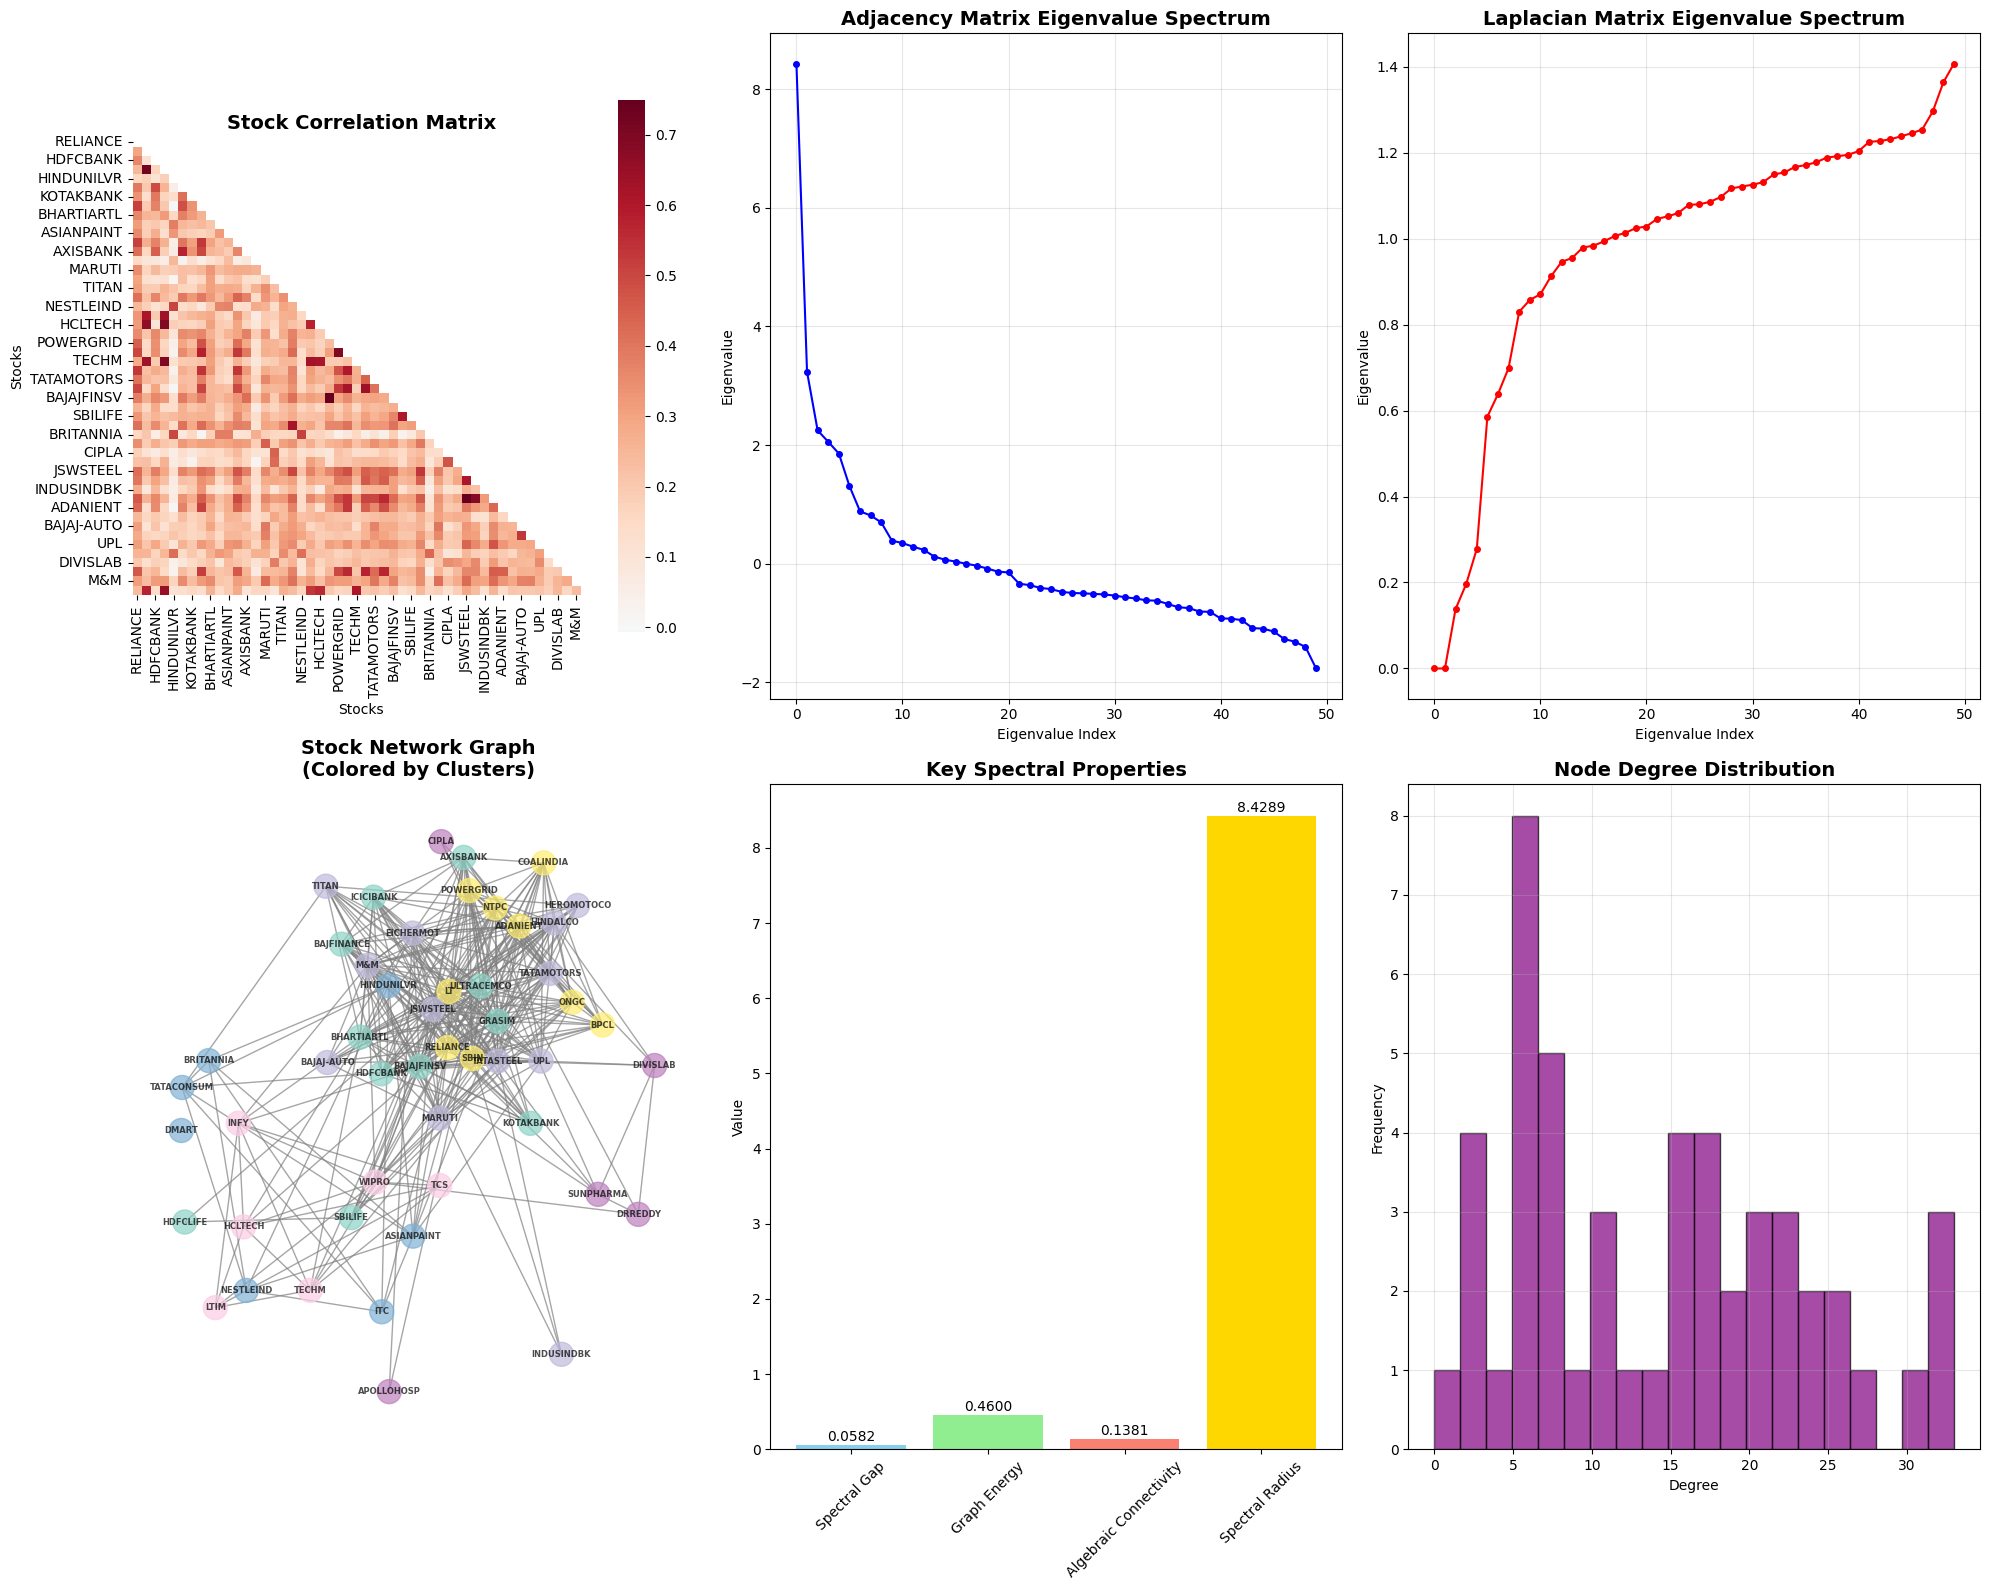


NIFTY 50 SPECTRAL GRAPH ANALYSIS SUMMARY

Data Summary:
  Number of stocks: 50
  Time period: 2023-09-29 to 2025-09-26
  Total trading days: 493

Graph Properties:
  Nodes: 50
  Edges: 358
  Density: 0.2922
  Average clustering coefficient: 0.7369
  Connected components: 2

Spectral Properties:
  Spectral Gap: 0.058210
  Graph Energy: 46.000457
  Algebraic Connectivity: 0.138069
  Largest Eigenvalue: 8.428867
  Spectral Radius: 8.428867

Correlation Statistics:
  Mean correlation: 0.2589
  Std correlation: 0.1155
  Max correlation: 0.7495
  Min correlation: -0.0069

✓ Analysis completed successfully!

Analyzer object is available for further exploration.
Available attributes: stock_data, returns, correlation_matrix, graph, spectral_properties


In [1]:
"""
Spectral Graph Methods for Financial Networks - Nifty 50 Analysis
================================================================

This script implements spectral graph theory methods to analyze the Nifty 50 stock network,
including correlation analysis, graph construction, spectral properties computation,
and community detection through spectral clustering.

Required packages: yfinance, numpy, pandas, networkx, matplotlib, seaborn, scikit-learn
"""

import yfinance as yf
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

class NiftySpectralAnalyzer:
    """
    A comprehensive class for spectral analysis of Nifty 50 stock networks.
    """

    def __init__(self, correlation_threshold=0.5):
        """
        Initialize the analyzer with configuration parameters.

        Args:
            correlation_threshold (float): Minimum correlation to create an edge
        """
        self.correlation_threshold = correlation_threshold
        self.nifty50_symbols = [
            'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'HINDUNILVR.NS',
            'ICICIBANK.NS', 'KOTAKBANK.NS', 'SBIN.NS', 'BHARTIARTL.NS', 'ITC.NS',
            'ASIANPAINT.NS', 'LT.NS', 'AXISBANK.NS', 'DMART.NS', 'MARUTI.NS',
            'SUNPHARMA.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'NESTLEIND.NS', 'WIPRO.NS',
            'HCLTECH.NS', 'BAJFINANCE.NS', 'POWERGRID.NS', 'NTPC.NS', 'TECHM.NS',
            'ONGC.NS', 'TATAMOTORS.NS', 'COALINDIA.NS', 'BAJAJFINSV.NS', 'HDFCLIFE.NS',
            'SBILIFE.NS', 'GRASIM.NS', 'BRITANNIA.NS', 'EICHERMOT.NS', 'CIPLA.NS',
            'DRREDDY.NS', 'JSWSTEEL.NS', 'HINDALCO.NS', 'INDUSINDBK.NS', 'TATASTEEL.NS',
            'ADANIENT.NS', 'APOLLOHOSP.NS', 'BAJAJ-AUTO.NS', 'HEROMOTOCO.NS', 'UPL.NS',
            'TATACONSUM.NS', 'DIVISLAB.NS', 'BPCL.NS', 'M&M.NS', 'LTIM.NS'
        ]
        self.stock_data = None
        self.returns = None
        self.correlation_matrix = None
        self.graph = None
        self.adjacency_matrix = None
        self.laplacian_matrix = None
        self.spectral_properties = {}

    def fetch_stock_data(self, start_date=None, end_date=None):
        """
        Fetch historical stock price data for Nifty 50 companies.

        Args:
            start_date (str): Start date in 'YYYY-MM-DD' format
            end_date (str): End date in 'YYYY-MM-DD' format
        """
        if start_date is None:
            start_date = (datetime.now() - timedelta(days=365*2)).strftime('%Y-%m-%d')
        if end_date is None:
            end_date = datetime.now().strftime('%Y-%m-%d')

        print(f"Fetching stock data from {start_date} to {end_date}...")

        # Download data for all symbols
        stock_data = {}
        successful_symbols = []

        for symbol in self.nifty50_symbols:
            try:
                ticker = yf.Ticker(symbol)
                data = ticker.history(start=start_date, end=end_date)
                if not data.empty and len(data) > 50:  # Ensure sufficient data
                    stock_data[symbol.replace('.NS', '')] = data['Close']
                    successful_symbols.append(symbol)
                    print(f"✓ {symbol}")
                else:
                    print(f"✗ {symbol} - Insufficient data")
            except Exception as e:
                print(f"✗ {symbol} - Error: {e}")

        # Create DataFrame with adjusted close prices
        self.stock_data = pd.DataFrame(stock_data)
        self.stock_data = self.stock_data.dropna()

        print(f"\nSuccessfully loaded data for {len(self.stock_data.columns)} stocks")
        print(f"Date range: {self.stock_data.index[0].date()} to {self.stock_data.index[-1].date()}")

        return self.stock_data

    def compute_returns_and_correlation(self):
        """
        Compute daily returns and correlation matrix.
        """
        if self.stock_data is None:
            raise ValueError("Stock data not loaded. Call fetch_stock_data() first.")

        print("Computing daily returns and correlation matrix...")

        # Calculate daily returns
        self.returns = self.stock_data.pct_change().dropna()

        # Calculate correlation matrix
        self.correlation_matrix = self.returns.corr()

        print(f"Returns shape: {self.returns.shape}")
        print(f"Correlation matrix shape: {self.correlation_matrix.shape}")

        return self.returns, self.correlation_matrix

    def construct_graph(self):
        """
        Construct network graph based on correlation threshold.
        """
        if self.correlation_matrix is None:
            raise ValueError("Correlation matrix not computed. Call compute_returns_and_correlation() first.")

        print(f"Constructing graph with correlation threshold: {self.correlation_threshold}")

        # Create graph
        self.graph = nx.Graph()

        # Add nodes (stocks)
        stocks = list(self.correlation_matrix.columns)
        self.graph.add_nodes_from(stocks)

        # Add edges based on correlation threshold
        n_stocks = len(stocks)
        edge_count = 0

        for i in range(n_stocks):
            for j in range(i+1, n_stocks):
                corr = self.correlation_matrix.iloc[i, j]
                if abs(corr) > self.correlation_threshold:
                    self.graph.add_edge(stocks[i], stocks[j], weight=abs(corr), correlation=corr)
                    edge_count += 1

        print(f"Graph created with {self.graph.number_of_nodes()} nodes and {self.graph.number_of_edges()} edges")
        print(f"Graph density: {nx.density(self.graph):.4f}")

        return self.graph

    def compute_matrices(self):
        """
        Compute adjacency and Laplacian matrices from the graph.
        """
        if self.graph is None:
            raise ValueError("Graph not constructed. Call construct_graph() first.")

        print("Computing adjacency and Laplacian matrices...")

        # Get adjacency matrix
        self.adjacency_matrix = nx.adjacency_matrix(self.graph, weight='weight').todense()
        self.adjacency_matrix = np.array(self.adjacency_matrix)

        # Compute Laplacian matrix (normalized)
        laplacian_sparse = nx.normalized_laplacian_matrix(self.graph, weight='weight')
        self.laplacian_matrix = laplacian_sparse.todense()
        self.laplacian_matrix = np.array(self.laplacian_matrix)

        print(f"Adjacency matrix shape: {self.adjacency_matrix.shape}")
        print(f"Laplacian matrix shape: {self.laplacian_matrix.shape}")

        return self.adjacency_matrix, self.laplacian_matrix

    def compute_spectral_properties(self):
        """
        Compute various spectral properties of the graph.
        """
        if self.adjacency_matrix is None or self.laplacian_matrix is None:
            raise ValueError("Matrices not computed. Call compute_matrices() first.")

        print("Computing spectral properties...")

        # Adjacency eigenvalues
        adj_eigenvalues = np.linalg.eigvals(self.adjacency_matrix)
        adj_eigenvalues = np.sort(adj_eigenvalues)[::-1]  # Sort in descending order

        # Laplacian eigenvalues
        lap_eigenvalues = np.linalg.eigvals(self.laplacian_matrix)
        lap_eigenvalues = np.sort(lap_eigenvalues)  # Sort in ascending order

        # Spectral gap (difference between two smallest non-zero Laplacian eigenvalues)
        non_zero_lap_eigs = lap_eigenvalues[lap_eigenvalues > 1e-8]
        spectral_gap = non_zero_lap_eigs[1] - non_zero_lap_eigs[0] if len(non_zero_lap_eigs) > 1 else 0

        # Graph energy (sum of absolute eigenvalues of adjacency matrix)
        graph_energy = np.sum(np.abs(adj_eigenvalues))

        # Store all properties
        self.spectral_properties = {
            'adjacency_eigenvalues': adj_eigenvalues,
            'laplacian_eigenvalues': lap_eigenvalues,
            'spectral_gap': spectral_gap,
            'graph_energy': graph_energy,
            'algebraic_connectivity': non_zero_lap_eigs[0] if len(non_zero_lap_eigs) > 0 else 0,
            'largest_eigenvalue': adj_eigenvalues[0],
            'spectral_radius': np.max(np.abs(adj_eigenvalues))
        }

        print("Spectral Properties:")
        print(f"  Spectral Gap: {spectral_gap:.6f}")
        print(f"  Graph Energy: {graph_energy:.4f}")
        print(f"  Algebraic Connectivity: {self.spectral_properties['algebraic_connectivity']:.6f}")
        print(f"  Spectral Radius: {self.spectral_properties['spectral_radius']:.4f}")

        return self.spectral_properties

    def perform_spectral_clustering(self, n_clusters=5):
        """
        Perform spectral clustering to detect communities.

        Args:
            n_clusters (int): Number of clusters to identify
        """
        if self.laplacian_matrix is None:
            raise ValueError("Laplacian matrix not computed. Call compute_matrices() first.")

        print(f"Performing spectral clustering with {n_clusters} clusters...")

        # Use sklearn's SpectralClustering
        spectral_clustering = SpectralClustering(
            n_clusters=n_clusters,
            affinity='precomputed',
            random_state=42
        )

        # Create affinity matrix from correlation matrix
        affinity_matrix = np.abs(self.correlation_matrix.values)
        np.fill_diagonal(affinity_matrix, 1)

        # Perform clustering
        cluster_labels = spectral_clustering.fit_predict(affinity_matrix)

        # Create mapping of stocks to clusters
        stocks = list(self.correlation_matrix.columns)
        clusters = {}
        for i, stock in enumerate(stocks):
            cluster_id = cluster_labels[i]
            if cluster_id not in clusters:
                clusters[cluster_id] = []
            clusters[cluster_id].append(stock)

        print("\nClusters identified:")
        for cluster_id, stocks_in_cluster in clusters.items():
            print(f"  Cluster {cluster_id}: {stocks_in_cluster}")

        return cluster_labels, clusters

    def visualize_analysis(self, cluster_labels=None, n_clusters=5):
        """
        Create comprehensive visualizations of the analysis.

        Args:
            cluster_labels: Cluster labels from spectral clustering
            n_clusters (int): Number of clusters for visualization
        """
        fig = plt.figure(figsize=(20, 16))

        # 1. Correlation Matrix Heatmap
        plt.subplot(2, 3, 1)
        mask = np.triu(np.ones_like(self.correlation_matrix))
        sns.heatmap(self.correlation_matrix, mask=mask, cmap='RdBu_r', center=0,
                   square=True, annot=False, cbar_kws={'shrink': 0.8})
        plt.title('Stock Correlation Matrix', fontsize=14, fontweight='bold')
        plt.xlabel('Stocks')
        plt.ylabel('Stocks')

        # 2. Adjacency Eigenvalue Spectrum
        plt.subplot(2, 3, 2)
        adj_eigs = self.spectral_properties['adjacency_eigenvalues']
        plt.plot(range(len(adj_eigs)), adj_eigs, 'bo-', markersize=4)
        plt.title('Adjacency Matrix Eigenvalue Spectrum', fontsize=14, fontweight='bold')
        plt.xlabel('Eigenvalue Index')
        plt.ylabel('Eigenvalue')
        plt.grid(True, alpha=0.3)

        # 3. Laplacian Eigenvalue Spectrum
        plt.subplot(2, 3, 3)
        lap_eigs = self.spectral_properties['laplacian_eigenvalues']
        plt.plot(range(len(lap_eigs)), lap_eigs, 'ro-', markersize=4)
        plt.title('Laplacian Matrix Eigenvalue Spectrum', fontsize=14, fontweight='bold')
        plt.xlabel('Eigenvalue Index')
        plt.ylabel('Eigenvalue')
        plt.grid(True, alpha=0.3)

        # 4. Network Graph Visualization
        plt.subplot(2, 3, 4)
        pos = nx.spring_layout(self.graph, k=1, iterations=50)

        # Color nodes by clusters if available
        if cluster_labels is not None:
            colors = plt.cm.Set3(np.linspace(0, 1, n_clusters))
            node_colors = [colors[cluster_labels[i]] for i in range(len(self.graph.nodes()))]
        else:
            node_colors = 'lightblue'

        nx.draw(self.graph, pos,
                node_color=node_colors,
                node_size=300,
                with_labels=True,
                font_size=6,
                font_weight='bold',
                edge_color='gray',
                alpha=0.7)
        plt.title('Stock Network Graph\n(Colored by Clusters)', fontsize=14, fontweight='bold')

        # 5. Spectral Properties Summary
        plt.subplot(2, 3, 5)
        properties = ['Spectral Gap', 'Graph Energy', 'Algebraic Connectivity', 'Spectral Radius']
        values = [
            self.spectral_properties['spectral_gap'],
            self.spectral_properties['graph_energy'] / 100,  # Scale for visualization
            self.spectral_properties['algebraic_connectivity'],
            self.spectral_properties['spectral_radius']
        ]

        bars = plt.bar(properties, values, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
        plt.title('Key Spectral Properties', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45)
        plt.ylabel('Value')

        # Add value labels on bars
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.4f}', ha='center', va='bottom', fontsize=10)

        # 6. Degree Distribution
        plt.subplot(2, 3, 6)
        degrees = [self.graph.degree(node) for node in self.graph.nodes()]
        plt.hist(degrees, bins=20, alpha=0.7, color='purple', edgecolor='black')
        plt.title('Node Degree Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Degree')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Display summary statistics
        self.print_summary_statistics()

    def print_summary_statistics(self):
        """
        Print comprehensive summary statistics of the analysis.
        """
        print("\n" + "="*80)
        print("NIFTY 50 SPECTRAL GRAPH ANALYSIS SUMMARY")
        print("="*80)

        print(f"\nData Summary:")
        print(f"  Number of stocks: {len(self.stock_data.columns)}")
        print(f"  Time period: {self.stock_data.index[0].date()} to {self.stock_data.index[-1].date()}")
        print(f"  Total trading days: {len(self.stock_data)}")

        print(f"\nGraph Properties:")
        print(f"  Nodes: {self.graph.number_of_nodes()}")
        print(f"  Edges: {self.graph.number_of_edges()}")
        print(f"  Density: {nx.density(self.graph):.4f}")
        print(f"  Average clustering coefficient: {nx.average_clustering(self.graph):.4f}")
        print(f"  Connected components: {nx.number_connected_components(self.graph)}")

        print(f"\nSpectral Properties:")
        for key, value in self.spectral_properties.items():
            if isinstance(value, (int, float)):
                print(f"  {key.replace('_', ' ').title()}: {value:.6f}")

        print(f"\nCorrelation Statistics:")
        corr_values = self.correlation_matrix.values
        corr_values = corr_values[np.triu_indices_from(corr_values, k=1)]
        print(f"  Mean correlation: {np.mean(corr_values):.4f}")
        print(f"  Std correlation: {np.std(corr_values):.4f}")
        print(f"  Max correlation: {np.max(corr_values):.4f}")
        print(f"  Min correlation: {np.min(corr_values):.4f}")


def main():
    """
    Main function to run the complete Nifty 50 spectral analysis.
    """
    print("Starting Nifty 50 Spectral Graph Analysis")
    print("="*50)

    # Initialize analyzer
    analyzer = NiftySpectralAnalyzer(correlation_threshold=0.3)  # Lower threshold for more connections

    try:
        # Step 1: Fetch stock data
        stock_data = analyzer.fetch_stock_data()

        # Step 2: Compute returns and correlation
        returns, correlation_matrix = analyzer.compute_returns_and_correlation()

        # Step 3: Construct graph
        graph = analyzer.construct_graph()

        # Step 4: Compute matrices
        adjacency_matrix, laplacian_matrix = analyzer.compute_matrices()

        # Step 5: Compute spectral properties
        spectral_properties = analyzer.compute_spectral_properties()

        # Step 6: Perform spectral clustering
        cluster_labels, clusters = analyzer.perform_spectral_clustering(n_clusters=6)

        # Step 7: Visualize results
        analyzer.visualize_analysis(cluster_labels, n_clusters=6)

        print("\n✓ Analysis completed successfully!")

        # Return analyzer for further analysis
        return analyzer

    except Exception as e:
        print(f"\n✗ Error during analysis: {e}")
        raise


if __name__ == "__main__":
    # Run the complete analysis
    analyzer = main()

    # The analyzer object contains all computed results and can be used for further analysis
    print("\nAnalyzer object is available for further exploration.")
    print("Available attributes: stock_data, returns, correlation_matrix, graph, spectral_properties")